### Student Information
Name: TATHEER HUSSAIN MIR

Student ID: I111154104

GitHub ID: https://github.com/TatheerHussain

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [5]:
### Begin Assignment Here

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

/Users/tatheerhussain/.pyenv/versions/3.6.9/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.20) or chardet (None)/charset_normalizer (3.0.1) doesn't match a supported version!
  RequestsDependencyWarning)
/Users/tatheerhussain/.pyenv/versions/3.6.9/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using custom data configuration Senem--Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data-ea8e3ccf9b870dad


Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 106.21it/s]


Dataset csv downloaded and prepared to /Users/tatheerhussain/.cache/huggingface/datasets/Senem___csv/Senem--Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data-ea8e3ccf9b870dad/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00, 11.68it/s]


In [4]:
# !pip install datasets


In [6]:
# Convert the dataset to a pandas DataFrame for easier manipulation
df = pd.DataFrame(ds['train'])  # Assuming we want the 'train' split

# Display the first few rows of the DataFrame
print(df.head())

# Display the information about the DataFrame
print(df.info())


       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None


In [7]:


# Convert the dataset to a pandas DataFrame for easier manipulation
df = pd.DataFrame(ds['train'])  # Assuming we want the 'train' split

In [8]:

# Display the first few rows of the DataFrame
print(df.head())

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


In [9]:


# Display the information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None


In [10]:

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 sentiment    0
comment      0
dtype: int64


In [11]:

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")


Number of duplicate records: 1


In [12]:

# Remove duplicates if any
df.drop_duplicates(inplace=True)


In [13]:


# Check the shape of the DataFrame after removing duplicates
print(f"Shape of DataFrame after removing duplicates: {df.shape}")

Shape of DataFrame after removing duplicates: (1499, 2)


In [14]:
# Sample the dataset
df_sample = df.sample(n=1000, random_state=42)


In [15]:
# Display the category distribution in the full dataset
print(df['sentiment'].value_counts())

nostalgia        750
not nostalgia    749
Name: sentiment, dtype: int64


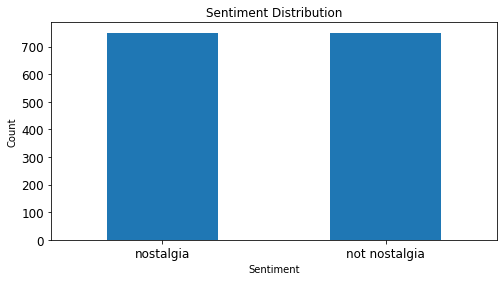

In [16]:
# Plot the category distribution in the full dataset
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution', rot=0, fontsize=12, figsize=(8, 4))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

not nostalgia    502
nostalgia        498
Name: sentiment, dtype: int64


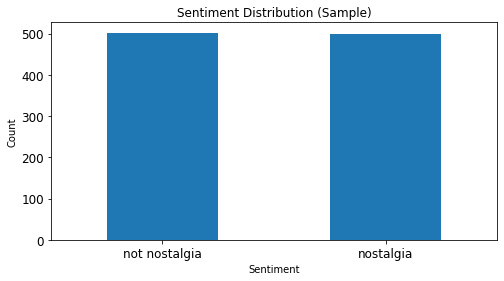

In [17]:
# Display the category distribution in the sample
print(df_sample['sentiment'].value_counts())

# Plot the category distribution in the sample
df_sample['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution (Sample)', rot=0, fontsize=12, figsize=(8, 4))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

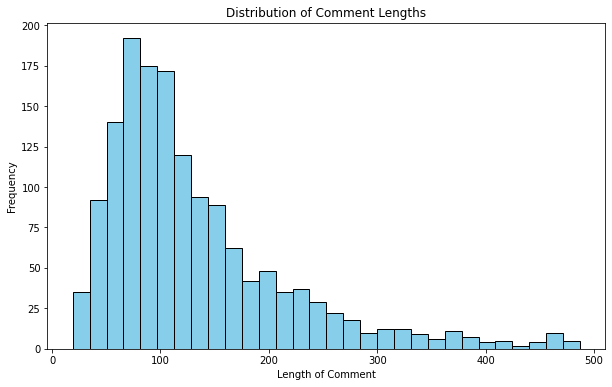

In [18]:

# Explore and visualize some comments
# Example: plotting the length of comments
df['comment_length'] = df['comment'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(df['comment_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comment')
plt.ylabel('Frequency')
plt.show()